<a href="https://colab.research.google.com/github/s4226/s4226db/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mnist 手寫數字辨識資料集
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()



In [ ]:
print('train data', len(x_train))
print('test data', len(x_test))

train data 60000
test data 10000


In [ ]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)

x_train: (60000, 28, 28)
y_train: (60000,)


In [ ]:
import matplotlib.pyplot as plt
def plot_image(image):
  fig = plt.gcf()
  fig.set_size_inches(2,2)
  plt.imshow(image, cmap='binary')
  plt.show()

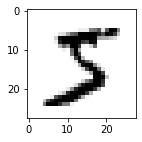

In [ ]:
plot_image(x_train[0])

In [ ]:
y_train[0]

5

In [ ]:
# reshape 重新改變維度 astype 改變資料類型
x_train= x_train.reshape(60000,784).astype('float32')
x_test= x_test.reshape(10000,784).astype('float32')


In [ ]:
print(x_train[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [ ]:
x_train= x_train/255
x_test= x_test/255

In [ ]:
# 分類
from keras.utils import np_utils


In [ ]:
y_train= np_utils.to_categorical(y_train)

In [ ]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
from keras.models import  Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=256, input_dim=784, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
print(model.summary())
# 200960 = 784*256+256
# 2570 = 256*10+10

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# 分類問題 -> cross entropy  optimizer -> adam演算法 
# 抽出20%資料做驗證資料 8:2
# accuracy -> training 正確率 val_accuracy -> 驗證資料 正確率
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history= model.fit(x=x_train, y=y_train, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Epoch 1/10
240/240 - 2s - loss: 0.3931 - accuracy: 0.8919 - val_loss: 0.2067 - val_accuracy: 0.9417
Epoch 2/10
240/240 - 1s - loss: 0.1768 - accuracy: 0.9499 - val_loss: 0.1484 - val_accuracy: 0.9582
Epoch 3/10
240/240 - 1s - loss: 0.1253 - accuracy: 0.9638 - val_loss: 0.1221 - val_accuracy: 0.9647
Epoch 4/10
240/240 - 1s - loss: 0.0933 - accuracy: 0.9736 - val_loss: 0.1049 - val_accuracy: 0.9693
Epoch 5/10
240/240 - 2s - loss: 0.0730 - accuracy: 0.9796 - val_loss: 0.0952 - val_accuracy: 0.9718
Epoch 6/10
240/240 - 1s - loss: 0.0583 - accuracy: 0.9843 - val_loss: 0.0877 - val_accuracy: 0.9746
Epoch 7/10
240/240 - 1s - loss: 0.0478 - accuracy: 0.9871 - val_loss: 0.0826 - val_accuracy: 0.9748
Epoch 8/10
240/240 - 1s - loss: 0.0387 - accuracy: 0.9900 - val_loss: 0.0840 - val_accuracy: 0.9757
Epoch 9/10
240/240 - 1s - loss: 0.0325 - accuracy: 0.9915 - val_loss: 0.0753 - val_accuracy: 0.9777
Epoch 10/10
240/240 - 1s - loss: 0.0258 - accuracy: 0.9940 - val_loss: 0.0784 - val_accuracy: 0.9766

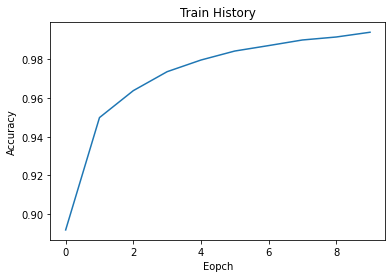

In [ ]:
plt.plot(train_history.history['accuracy'])
plt.title('Train History')
plt.ylabel('Accuracy')
plt.xlabel('Eopch')
plt.show()

In [ ]:
print(train_history.history)

{'loss': [0.3931122124195099, 0.17676550149917603, 0.12526962161064148, 0.09330463409423828, 0.07296358793973923, 0.05827483534812927, 0.04775984212756157, 0.038660306483507156, 0.03246385604143143, 0.02582499012351036], 'accuracy': [0.8918750286102295, 0.9498958587646484, 0.9638124704360962, 0.973604142665863, 0.9796249866485596, 0.9842708110809326, 0.9870833158493042, 0.9899791479110718, 0.9915208220481873, 0.9939791560173035], 'val_loss': [0.20672975480556488, 0.14839720726013184, 0.12207038700580597, 0.10486454516649246, 0.09515944123268127, 0.08770786225795746, 0.08255649358034134, 0.08400844037532806, 0.07534180581569672, 0.07842189818620682], 'val_accuracy': [0.9416666626930237, 0.9581666588783264, 0.9646666646003723, 0.9693333506584167, 0.971750020980835, 0.9745833277702332, 0.9748333096504211, 0.9756666421890259, 0.9776666760444641, 0.9765833616256714]}


In [ ]:
# predict_class -> 預測類別
prediction = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
print(prediction)

[7 2 1 ... 4 5 6]


In [ ]:
# 混淆矩陣 Confusion matrix
import pandas as pd
pd.crosstab(y_test, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,0,1,1,0,1,2,1,1,0
1,0,1125,4,0,0,1,2,1,2,0
2,5,3,1008,2,1,0,2,4,7,0
3,0,1,1,996,0,2,0,4,4,2
4,2,1,3,0,961,0,4,3,1,7
5,2,0,0,17,1,861,4,2,4,1
6,5,3,2,1,3,3,938,0,3,0
7,1,4,6,3,0,0,0,1011,0,3
8,2,0,2,9,5,2,3,6,942,3


作業：測試資料正確率至少大於95%